# Problem 1

**Bagged Decision Tree**

In this homework you are gonna learn 2 things how to use all processor on your machine(in python) and Bagged(Bootstrap Aggregating) Decision Tree.

Bagging(Bootstrap Aggregating) is a common way to prevent overfitting. The idea is to make a bunch of trees. Each with a handicapped data. To handicap the data, one could either use just the subset or just remove some features.

Then after you get a bunch of classifiers(trees) all we need to do is average the output.

Consider the following data write a Bagged Decision Tree out of it.

- For each tree use roughly half the sample randomly pick data (`np.random.choice` is your friend).
- Use minleaf of 20 or so.
- Train 100 trees.
- Make contour plot.

In [4]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

(-5, 5)

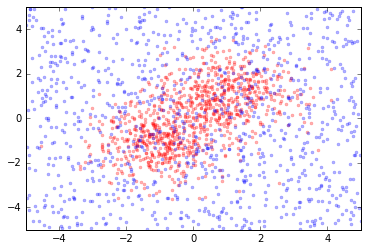

In [9]:
np.random.seed(1234)
nset = 500
xp11 = np.random.randn(nset,1)-1
xp21 = np.random.randn(nset,1)-1

xp12 = np.random.randn(nset,1)+1
xp22 = np.random.randn(nset,1)+1

xp1 = np.concatenate((xp11, xp12))
xp2 = np.concatenate((xp21, xp22))

pcls = np.zeros((nset*2))
pcls[:] = 1

xn1 = np.random.random((nset*2,1))*10-5
xn2 = np.random.random((nset*2,1))*10-5
ncls = np.zeros((1000))
ncls[:] = -1

x1s = np.concatenate([xp1, xn1])
x2s = np.concatenate([xp2, xn2])
cls = np.concatenate([pcls, ncls])
features = np.concatenate((x1s, x2s), axis=1)

cls>0
plt.plot(features[cls>0, 0], features[cls>0, 1], '.r', alpha=0.3)
plt.plot(features[cls<0, 0], features[cls<0, 1], '.b', alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

## 1.2 
Parallelize your code

You can see that training 100 trees takes quite a while. In this problem your job is to modify your code a little bit so that it uses all processor on your machine.

**Save often. There is a chance it will crash your computer.**

https://docs.python.org/2/library/multiprocessing.html

Be careful about np.random.rand in multiprocessing environment. Pass the seed to each process. https://stackoverflow.com/questions/24345637/why-doesnt-numpy-random-and-multiprocessing-play-nice

In [14]:
from multiprocessing import Pool

def f(x):
    return x*x

p = Pool(5)
print(p.map(f, [1, 2, 3]))
p.close()

[1, 4, 9]


# Problem 2

**Regression Tree**

In the class we learned how to make classification tree which return probability of being of one class.

We can extend this idea so that it can do regression; outputting number from $-\infty$ to $\infty$.

Here is the idea. We want to carve out the a region and return the **mean** of the **value** in that region.
<img src="regressiontree.png"/>

## 2.1
Given that we want to return the **mean** of the data in in the region. This means that a good region split should make the **mean** of each region close to the value of the data in the corresponding region.

With this basic idea. Write down how to calculate the score for the split.

## 2.2
Consider the following data. Build a regression tree to prdict the `z` value.

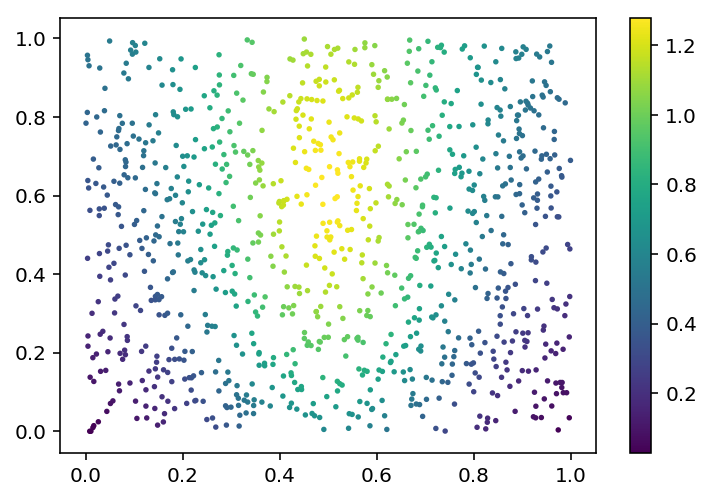

In [31]:
import numpy as np
from matplotlib import pyplot as plt
ndata = 1000
x = np.random.rand(ndata)
y = np.random.rand(ndata)
z = np.exp(-(x-0.5)**2/2/0.2**2 + -(y-0.5)**2/2/0.5**2)+0.5*y
plt.scatter(x,y, c=z,s=3)
plt.colorbar()